In [1]:
!pip install gensim

In [2]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
import random

# Giảm Chiều và Trực quan hóa Vector

In [3]:
def find_k_similar(model, target_word, k=5):
    print(f"Từ được chọn ngẫu nhiên: {target_word}")
    if target_word not in model.key_to_index:
        raise ValueError(f"'{target_word}' không có trong từ điển.")

    target_vec = model[target_word]
    similarities = {}

    for word in model.key_to_index:
        if word != target_word:
            similarities[word] = np.dot(target_vec, model[word]) / (
                    np.linalg.norm(target_vec) * np.linalg.norm(model[word]))

    # độ tương đồng giảm dần
    sorted_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

    print("\nTừ tương đồng (tự xây dựng):")
    for w, score in sorted_similar[:k]:
        print(f"{w}: {score:.4f}")

    similar_words = model.most_similar(target_word, topn=k)
    print(f"\nTừ tương đồng (thư viện có sẵn)")
    for w, score in similar_words:
        print(f"{w}: {score:.4f}")


def visualize_2d(words, vectors, n_words_to_plot=500, n_words_to_label=100):
    print(f"Trực quan hóa 2D {n_words_to_plot} vector từ...")
    words_subset = words[:n_words_to_plot]
    vectors_subset = vectors[:n_words_to_plot]

    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=250)
    tsne_result = tsne.fit_transform(vectors_subset)

    plt.figure(figsize=(14, 10))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=30, alpha=0.7)

    for i, word in enumerate(words_subset[:n_words_to_label]):
        plt.annotate(
            word,
            xy=(tsne_result[i, 0], tsne_result[i, 1]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom',
            fontsize=9
        )

    plt.title(f"Trực quan hóa Word Embeddings (t-SNE, {n_words_to_plot} từ)", fontsize=16)
    plt.xlabel("Thành phần t-SNE 1")
    plt.ylabel("Thành phần t-SNE 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


def visualize_3d(words, vectors, n_words_to_plot=500, n_words_to_label=100):
    print(f"Trực quan hóa 3D {n_words_to_plot} vector từ...")
    words_subset = words[:n_words_to_plot]
    vectors_subset = vectors[:n_words_to_plot]

    pca = PCA(n_components=3, random_state=42)
    pca_result = pca.fit_transform(vectors_subset)

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')

    scatter = ax.scatter(
        pca_result[:, 0],
        pca_result[:, 1],
        pca_result[:, 2],
        c=np.arange(len(words_subset)),
        cmap='viridis',
        s=40
    )

    # Gán nhãn cho các điểm
    if n_words_to_label > 0:
        print(f"Đang gán nhãn cho {n_words_to_label} từ đầu tiên trong biểu đồ 3D...")
        for i, word in enumerate(words_subset[:n_words_to_label]):
            ax.text(
                pca_result[i, 0],
                pca_result[i, 1],
                pca_result[i, 2],
                word,
                fontsize=8,
                color='black'
            )

    ax.set_title(f"Trực quan hóa Word Embeddings (PCA 3D, {n_words_to_plot} từ)", fontsize=16)
    ax.set_xlabel("Thành phần PCA 1")
    ax.set_ylabel("Thành phần PCA 2")
    ax.set_zlabel("Thành phần PCA 3")

    cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label('Chỉ mục từ (Từ càng đầu danh sách càng có màu tối)', rotation=270, labelpad=20)
    plt.show()


def load_model(model_name='word2vec'):
    if model_name.lower() == 'word2vec':
        model = api.load("word2vec-google-news-300")
    elif model_name.lower() == 'glove':
        model = api.load("glove-wiki-gigaword-300")
    else:
        model = api.load("fasttext-wiki-news-subwords-300")
    print(f"Load thành công {model_name}")

    words = list(model.key_to_index.keys())[:500]
    vectors = [model[word] for word in words]
    vectors = np.array(vectors)

    vocab_size = len(model.key_to_index)
    print(f"Vocabulary Size: {vocab_size:,}")
    vector_dim = model.vector_size
    print(f"Dimension: {vector_dim}")

    return model, words, vectors

In [4]:
word2vec, words_word2vec, vectors_word2vec = load_model(model_name='word2vec')

Load thành công word2vec
Vocabulary Size: 3,000,000
Dimension: 300


Trực quan hóa 2D 500 vector từ...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


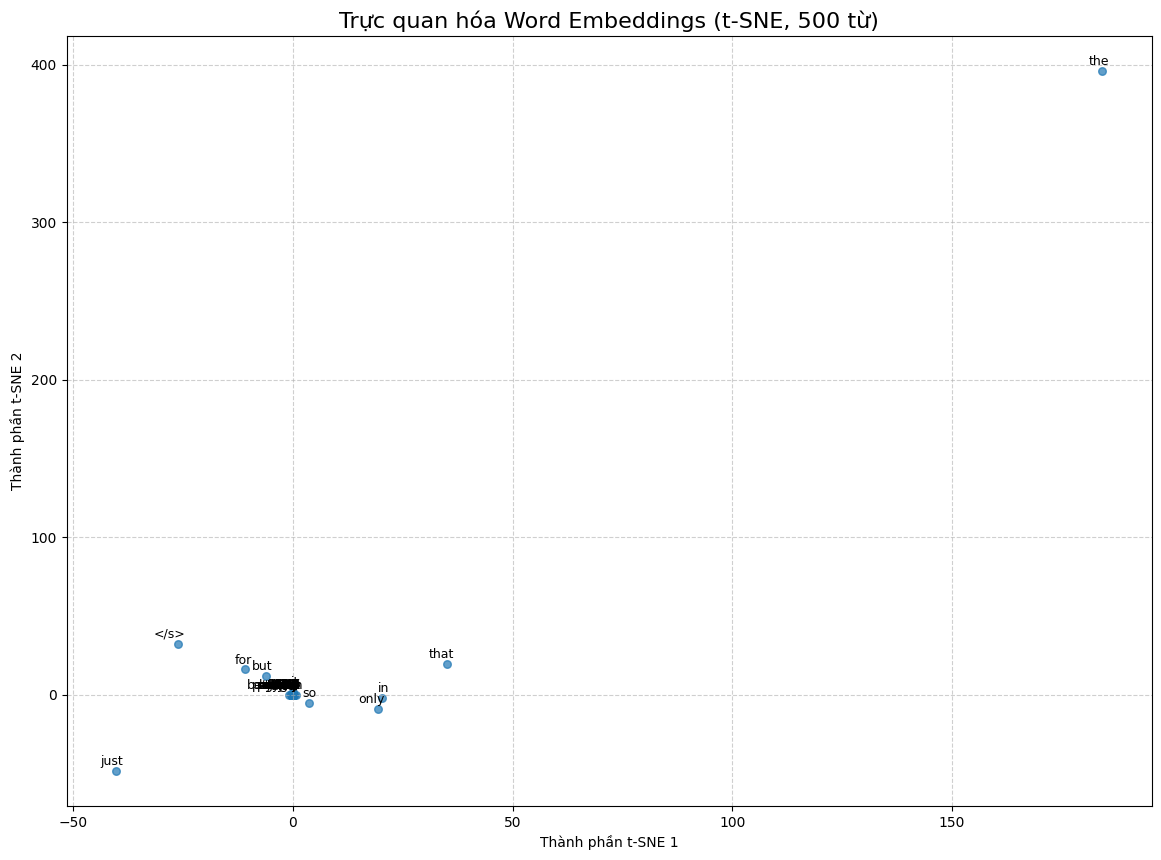

In [5]:
visualize_2d(words_word2vec, vectors_word2vec)

Trực quan hóa 3D 500 vector từ...
Đang gán nhãn cho 100 từ đầu tiên trong biểu đồ 3D...


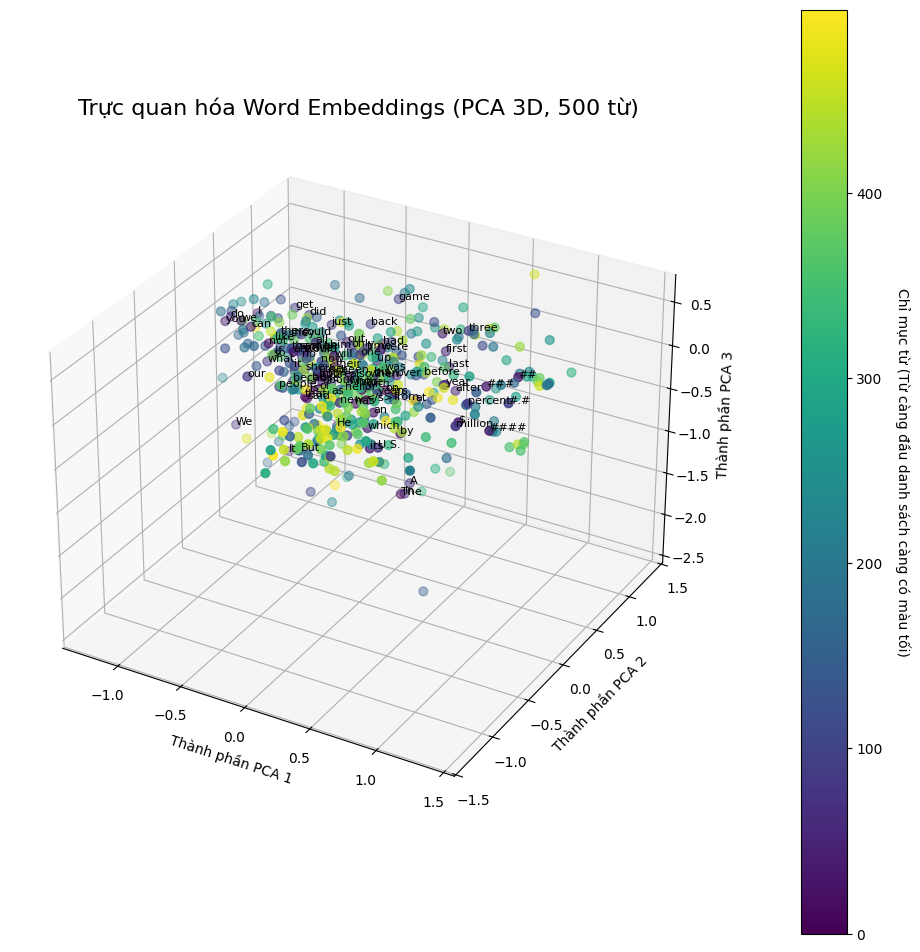

In [6]:
visualize_3d(words_word2vec, vectors_word2vec)

In [7]:
glove, words_glove, vectors_glove = load_model(model_name='glove')

Load thành công glove
Vocabulary Size: 400,000
Dimension: 300


Trực quan hóa 2D 500 vector từ...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


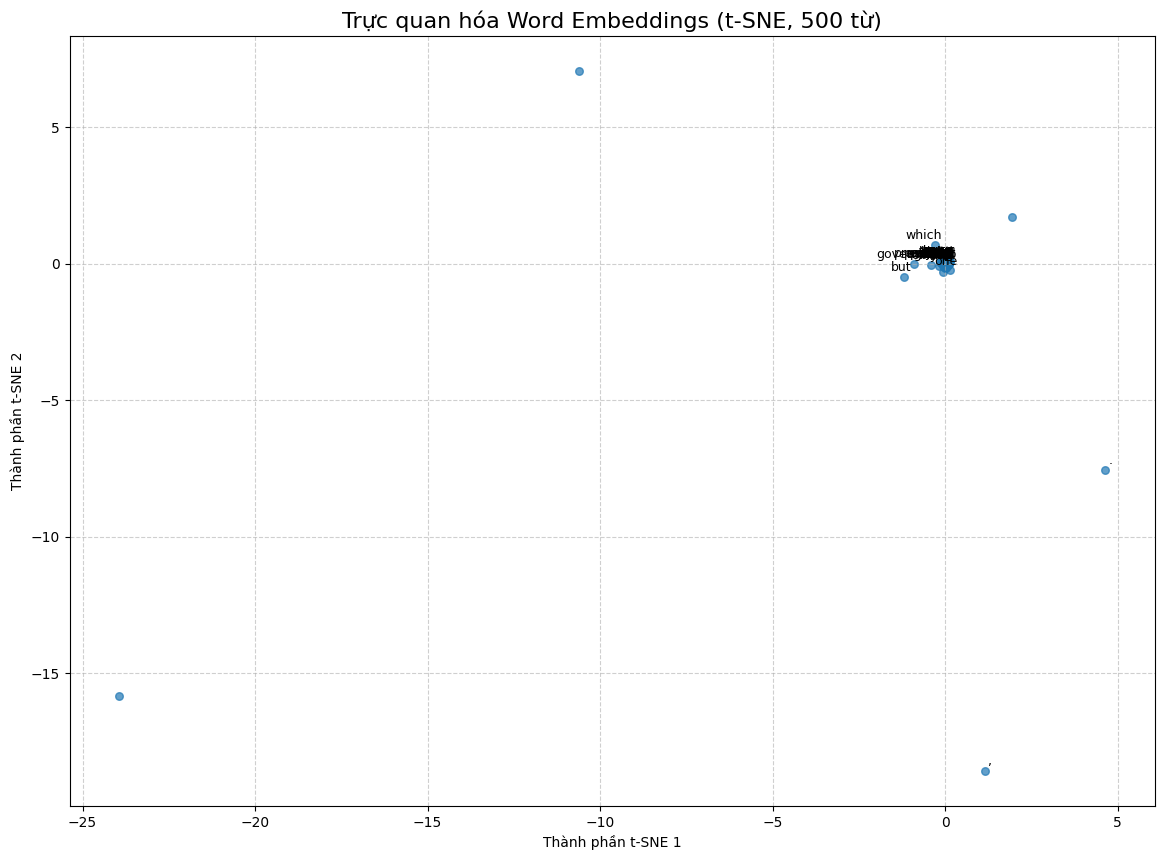

In [8]:
visualize_2d(words_glove, vectors_glove)

Trực quan hóa 3D 500 vector từ...
Đang gán nhãn cho 100 từ đầu tiên trong biểu đồ 3D...


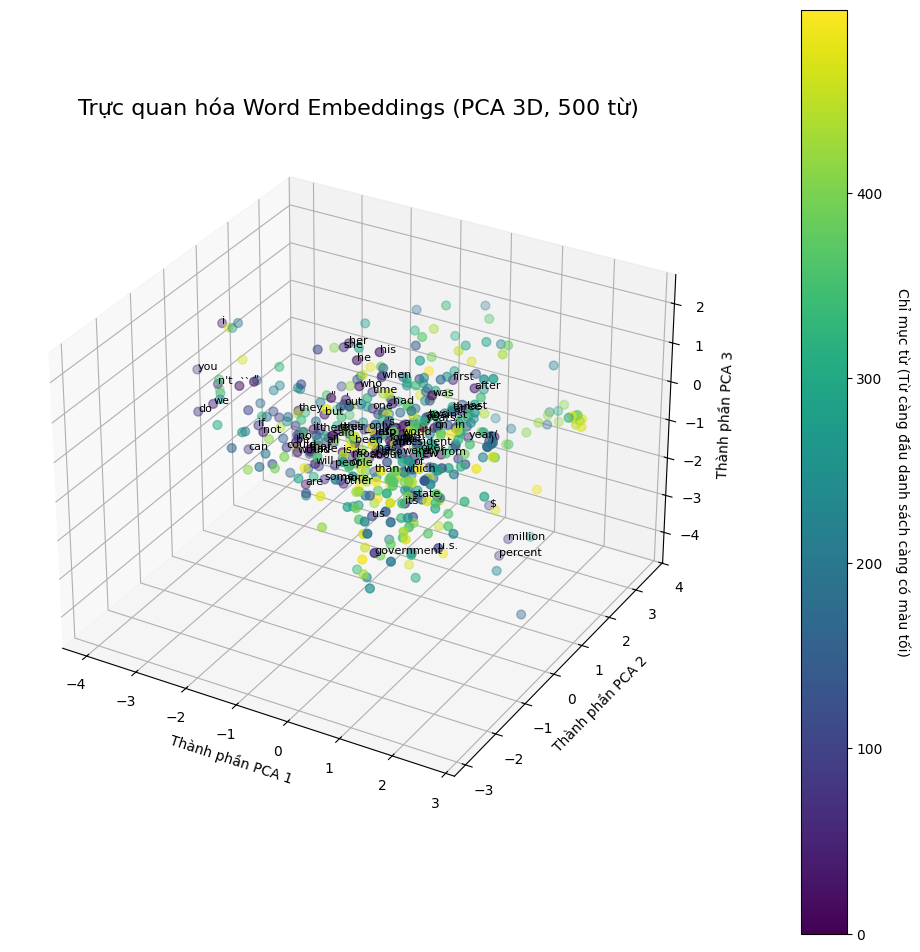

In [9]:
visualize_3d(words_glove, vectors_glove)

## Nhận xét

**Word2Vec** (Predictive, Context-Window-based) và **GloVe** (Count-based, Global Co-occurrence) đại diện cho hai triết lý học vector từ khác nhau, nhưng chúng cho thấy kết quả trực quan tương đối tương đồng trong việc sắp xếp các từ phổ biến:
*   Sự phân cụm Ngữ nghĩa Tinh tế (t-SNE): Cả hai mô hình đều tạo ra các cụm từ có sự gắn kết ngữ nghĩa chặt chẽ, đặc biệt là các từ chức năng (stop words).
    *   Word2Vec: Các từ chức năng (như "for," "but," "that," "in") tập trung thành một cụm dày đặc, trong khi từ có tần suất cực cao ("the") có thể bị đẩy ra xa hơn.
    *   GloVe: Các từ chức năng (như "which," "go," "from," "but") cũng tạo thành một cụm rất chặt, cho thấy mối quan hệ đồng xuất hiện toàn cục của chúng.
*   Cấu trúc Toàn cục (PCA): Cả hai đều cho thấy hiện tượng Centering Effect (Hiệu ứng Trung tâm): Các từ có tần suất xuất hiện cao nhất (màu tím/xanh đậm) có xu hướng tập trung ở gần gốc tọa độ của không gian PCA. Điều này phản ánh rằng những từ này xuất hiện trong nhiều ngữ cảnh khác nhau, làm cho vector của chúng ít chuyên biệt hóa và nằm ở trung tâm của sự phân bố.

Tóm lại, Word2Vec và GloVe đều xây dựng một không gian vector mạnh mẽ, nơi sự tương đồng ngữ nghĩa được mã hóa thành khoảng cách vector. Sự khác biệt giữa chúng thường nằm ở cấu trúc cục bộ (GloVe có xu hướng tốt hơn với từ vựng hiếm do dữ liệu toàn cục, Word2Vec tốt hơn với ngữ cảnh cục bộ).

In [10]:
fasttext, words_fasttext, vectors_fasttext = load_model(model_name='fasttext')

Load thành công fasttext
Vocabulary Size: 999,999
Dimension: 300


Trực quan hóa 2D 500 vector từ...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


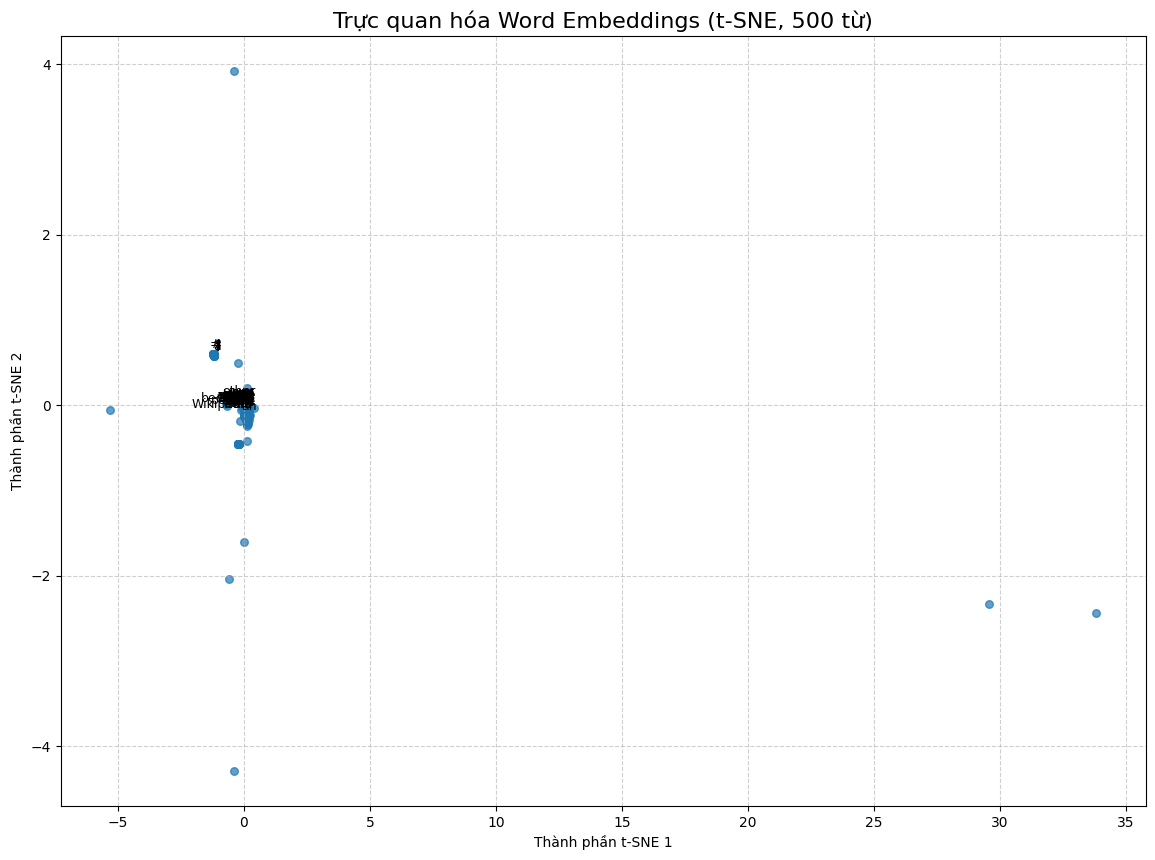

In [11]:
visualize_2d(words_fasttext, vectors_fasttext)

Trực quan hóa 3D 500 vector từ...
Đang gán nhãn cho 100 từ đầu tiên trong biểu đồ 3D...


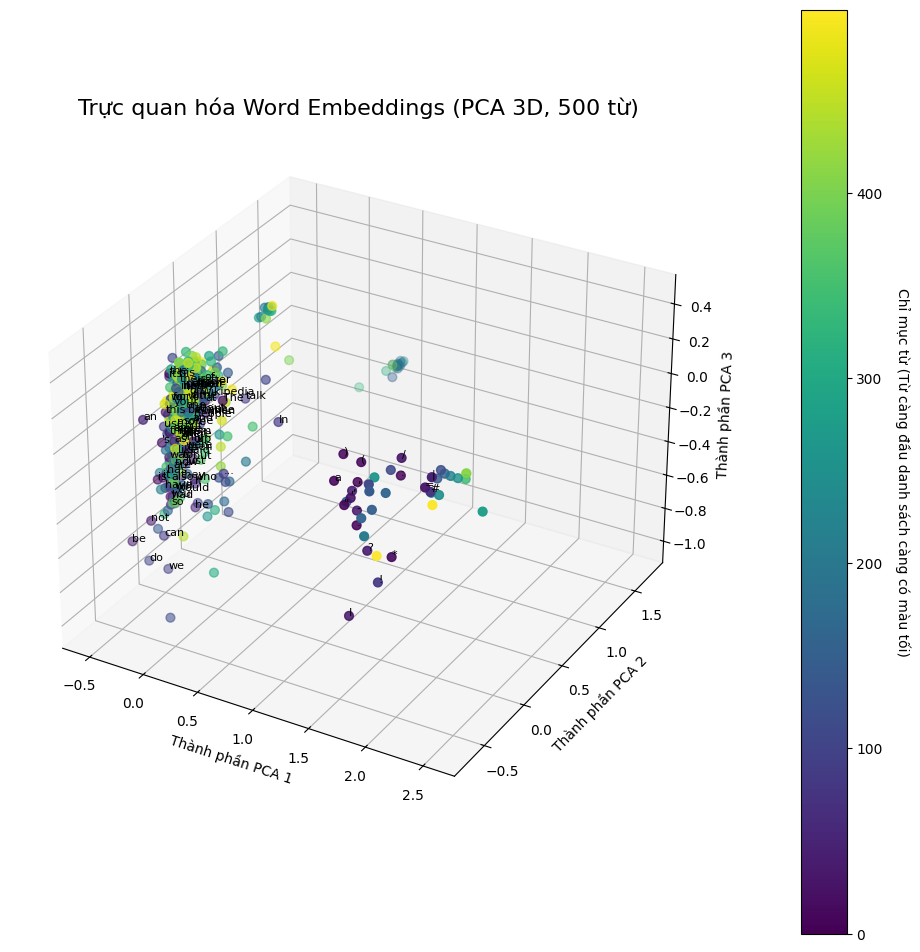

In [12]:
visualize_3d(words_fasttext, vectors_fasttext)

## Nhận xét

**FastText** là mô hình khác biệt hoàn toàn vì nó sử dụng kỹ thuật subword (từ con), biểu diễn mỗi từ như tổng hợp các vector của các n-gram ký tự cấu thành nó.
*   Sự Đồng nhất Cực cao (t-SNE): Biểu đồ t-SNE của FastText cho thấy sự tập trung của các từ phổ biến là cực đoan hơn so với Word2Vec và GloVe.
    *   Hầu hết 500 từ đều chồng chất lên nhau trong một khu vực rất nhỏ.
    *   Lý do: Các từ chức năng phổ biến có nhiều n-gram ký tự trùng lặp (ví dụ: 'th', 'in', 'an'). Vì FastText cộng các vector từ con này, sự trùng lặp này khiến các vector từ cuối cùng trở nên quá giống nhau đối với t-SNE. Điều này làm giảm khả năng trực quan hóa các mối quan hệ tinh tế giữa các từ phổ biến.
*   Phân tách rõ rệt (PCA): Biểu đồ PCA của FastText cho thấy sự phân tách rõ ràng thành hai nhóm chính:
    *   Cụm Trung tâm: Các từ chức năng.
    *   Cụm Ngoại vi: Các từ nội dung (danh từ, động từ, tính từ).
    *   Ý nghĩa: Phương pháp từ con giúp FastText tìm ra sự khác biệt lớn hơn về mặt cấu trúc giữa các vector, cho phép PCA dễ dàng xác định các chiều (Thành phần) phân biệt mạnh mẽ giữa vai trò ngữ pháp và tần suất xuất hiện.
Kết luận: FastText tạo ra một không gian vector có tính đồng nhất cao hơn đối với các từ phổ biến do cơ chế từ con. Dù điều này mang lại lợi ích lớn trong xử lý từ hiếm, nó khiến cho việc phân cụm bằng t-SNE trở nên quá tải, nhưng lại cho phép PCA thể hiện rõ ràng sự phân tách giữa các loại từ.

# Tìm k từ tương đồng

In [19]:
target_word = random.choice(list(word2vec.key_to_index.keys()))
find_k_similar(word2vec, target_word)

Từ được chọn ngẫu nhiên: BioVeris

Từ tương đồng (tự xây dựng):
Genaissance: 0.6233
Meso_Scale_Diagnostics: 0.6225
Vegenics: 0.6146
Ore_Pharmaceuticals: 0.6088
Ibis_Biosciences: 0.6084

Từ tương đồng (thư viện có sẵn)
Genaissance: 0.6233
Meso_Scale_Diagnostics: 0.6225
Vegenics: 0.6146
Ore_Pharmaceuticals: 0.6088
Ibis_Biosciences: 0.6084


In [20]:
target_word = random.choice(list(glove.key_to_index.keys()))
find_k_similar(glove, target_word)

Từ được chọn ngẫu nhiên: art-making

Từ tương đồng (tự xây dựng):
suwannakij: 0.4900
multi-sensory: 0.4721
supunnabul: 0.4667
zety: 0.4565
rw97: 0.4542

Từ tương đồng (thư viện có sẵn)
suwannakij: 0.4900
multi-sensory: 0.4721
supunnabul: 0.4667
zety: 0.4565
rw97: 0.4542


In [21]:
target_word = random.choice(list(fasttext.key_to_index.keys()))
find_k_similar(fasttext, target_word)

Từ được chọn ngẫu nhiên: dhe

Từ tương đồng (tự xây dựng):
edhe: 0.8821
të: 0.8590
Edhe: 0.8514
për: 0.8435
në: 0.8400

Từ tương đồng (thư viện có sẵn)
edhe: 0.8821
të: 0.8590
Edhe: 0.8514
për: 0.8435
në: 0.8400


## Nhận xét

Trong cả ba ví dụ, kết quả "Từ tương đồng (tự xây dựng)" và "Từ tương đồng (thư viện có sẵn)" là hoàn toàn giống nhau. Điều này xác nhận rằng việc triển khai công thức Cosine Similarity thủ công trong mã nguồn đã chính xác và mang lại kết quả đồng nhất với hàm model.most_similar() tích hợp sẵn.